In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cplAE_MET.utils.dataset import  load_M_inh_dataset
from cplAE_MET.utils.utils import loadpkl
import cplAE_MET.utils.plots as utplt

In [2]:
output = loadpkl("/Users/fahimehb/Documents/git-workspace/cplAE_MET/data/results/DEBUG/exit_summary_MAE0_aM_1-0_asd_1-0_noise_0-0_dilate_0_scale_0-1_ld_3_ne_50000_ri_0_fold_0.pkl")
# output = loadpkl("/Users/fahimehb/Documents/git-workspace/cplAE_MET/data/results/DEBUG/checkpoint_ep_7000_MAE0_aM_1-0_asd_1-0_noise_0-0_dilate_0_scale_0-2_ld_3_ne_50000_ri_0_fold_0.pkl")
input = load_M_inh_dataset("/Users/fahimehb/Documents/git-workspace/cplAE_MET/data/proc/M_im_data_3Nov2021.mat")

In [3]:
val_cells = output['val']

## Plot original images and soma depth together with the reconstructed soma depth
In the input file, the soma depth should be multiplied by 100 to show the correct soma depth when comparing with the image:

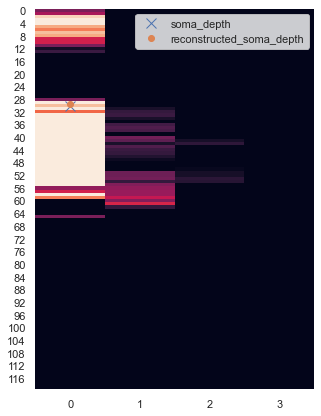

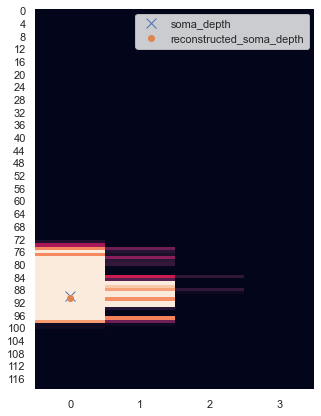

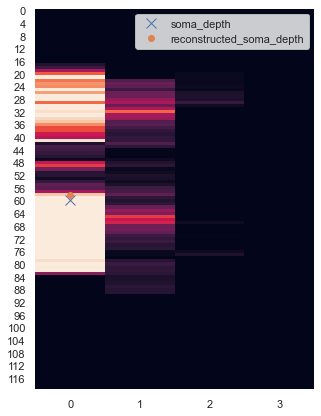

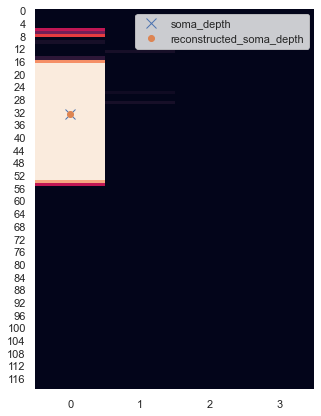

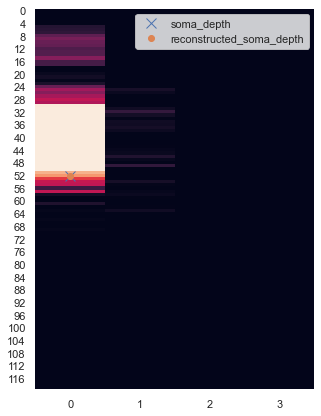

In [4]:
%matplotlib inline
for cell_id in val_cells[0:5]:
    plt.figure(figsize=(5,7))
    sns.heatmap(input['XM'][cell_id,:,:,0], cbar=False, vmin=0, vmax=1)
    plt.plot(0.5, input['X_sd'][cell_id]*100 , 'x', ms=10, label="soma_depth")
    plt.plot(0.5, output['Xr_sd'][cell_id]*100 , 'o', label="reconstructed_soma_depth")
    plt.legend()


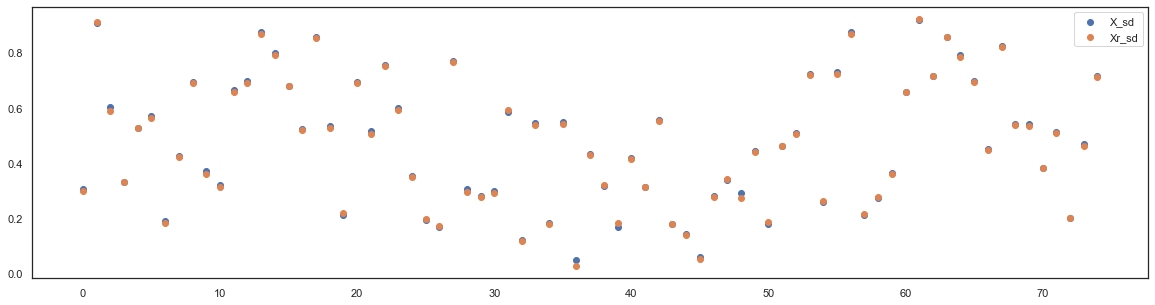

In [8]:
plt.figure(figsize=(20,5))
plt.scatter(np.arange(len(val_cells)), output['X_sd'][val_cells], label="X_sd")
plt.scatter(np.arange(len(val_cells)), output['Xr_sd'][val_cells], label="Xr_sd")
plt.legend()

In the output file, the cell has been padded from top and bottom and then soma was put to the center of the image. So, the soma depth is 120 if the image depth is 240:

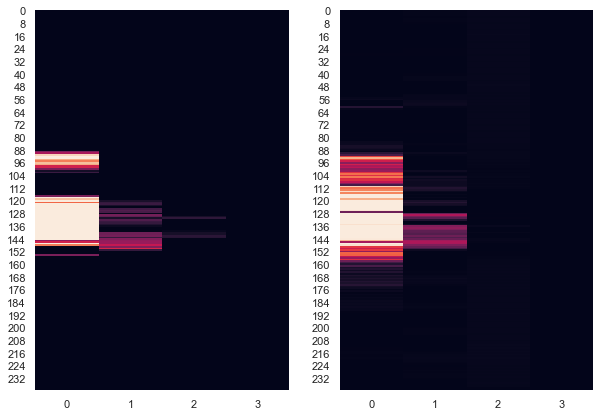

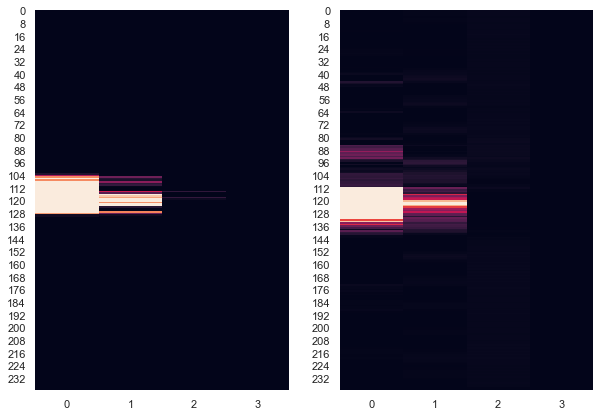

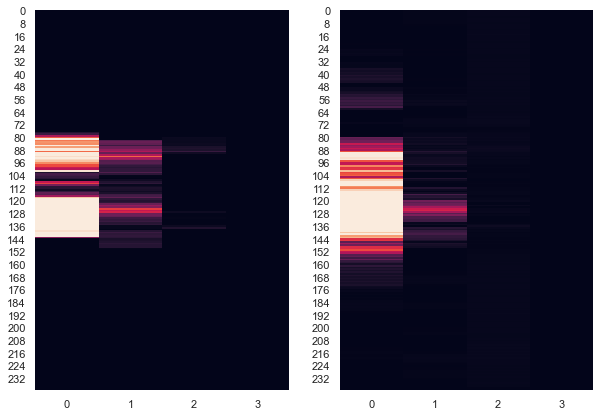

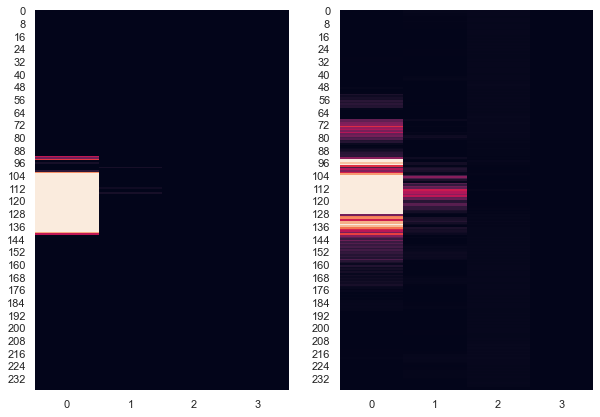

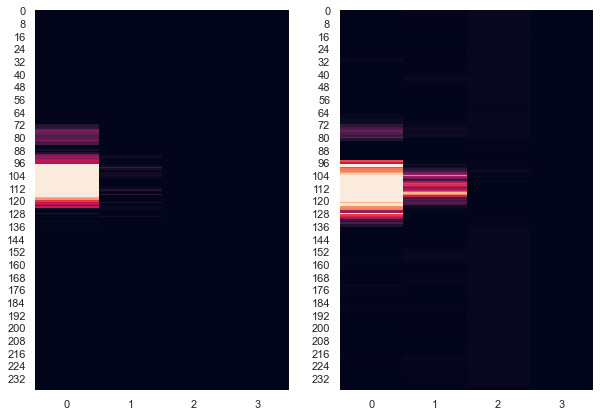

In [6]:
for cell_id in val_cells[0:5]:

    f, ax = plt.subplots(1, 2, figsize=(10,7))
    sns.heatmap(output['XM'][cell_id, 0, :, :, 0], cbar=False, ax=ax[0], vmin=0, vmax=1)
    sns.heatmap(output['XrM'][cell_id, 0, :, :, 0], cbar=False, ax=ax[1], vmin=0, vmax=1)


No handles with labels found to put in legend.


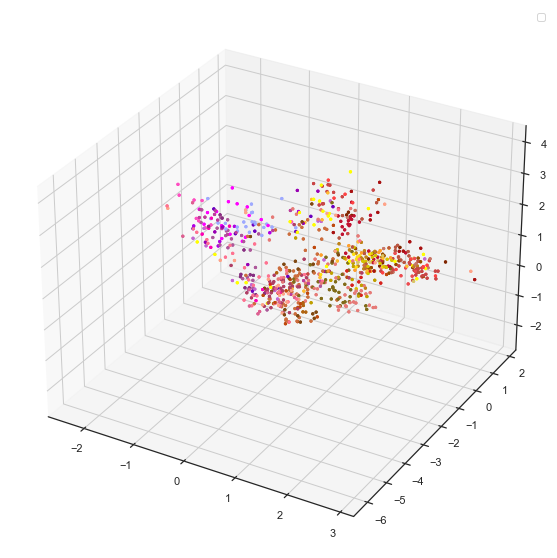

In [7]:
left = output
right= output
utplt.plot_multiple_embeddings(left["z"],
                               right["z"], 
                               figsize=(10,10),
                               plot_dim=3, 
                               left_color=left['cluster_color'],
                               right_color=right['cluster_color'],
                               left_marker='o',
                               right_marker='o',
                               side_by_side=False,
                               scatter_point_size=5)